In [2]:
#data loading
import pandas as pd
filename="/content/BudgetFood.csv"
a=pd.read_csv(str(filename))

print(a)

       rownames     wfood   totexp  age  size  town    sex
0             1  0.467699  1290941   43     5     2    man
1             2  0.313023  1277978   40     3     2    man
2             3  0.376482   845852   28     3     2    man
3             4  0.439691   527698   60     1     2  woman
4             5  0.403615  1103220   37     5     2    man
...         ...       ...      ...  ...   ...   ...    ...
23967     23968  0.556862   432818   87     4     4    man
23968     23969  0.433276  1096826   45     2     4    man
23969     23970  0.572559   807030   36     3     4    man
23970     23971  0.000000   107320   76     1     4  woman
23971     23972  0.390722   342832   54     2     4    man

[23972 rows x 7 columns]


In [3]:
print(a.head())

   rownames     wfood   totexp  age  size  town    sex
0         1  0.467699  1290941   43     5     2    man
1         2  0.313023  1277978   40     3     2    man
2         3  0.376482   845852   28     3     2    man
3         4  0.439691   527698   60     1     2  woman
4         5  0.403615  1103220   37     5     2    man


In [4]:
print(a.tail())

       rownames     wfood   totexp  age  size  town    sex
23967     23968  0.556862   432818   87     4     4    man
23968     23969  0.433276  1096826   45     2     4    man
23969     23970  0.572559   807030   36     3     4    man
23970     23971  0.000000   107320   76     1     4  woman
23971     23972  0.390722   342832   54     2     4    man


In [5]:
##Checking for null values
a.isna().sum()

,0
rownames,0
wfood,0
totexp,0
age,0
size,0
town,0
sex,1


In [25]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="totexp"

#transform string into int
transformColumns={6}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

       rownames  wfood  totexp  age  size  town  sex
0             0  17189   19487   27     5     2    0
1             1   8928   19390   24     3     2    0
2             2  12646   13976   12     3     2    0
3             3  15878    7537   44     1     2    1
4             4  14107   17649   21     5     2    0
...         ...    ...     ...  ...   ...   ...  ...
23967     23967  20319    5583   71     4     4    0
23968     23968  15561   17580   29     2     4    0
23969     23969  20735   13253   20     3     4    0
23970     23970      0     310   60     1     4    1
23971     23971  13437    3848   38     2     4    0

[23972 rows x 7 columns]


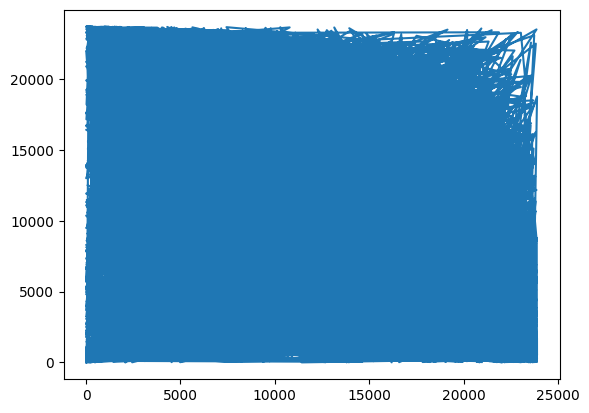

In [26]:
from matplotlib import pyplot as plt

index=1
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 23972 artists>

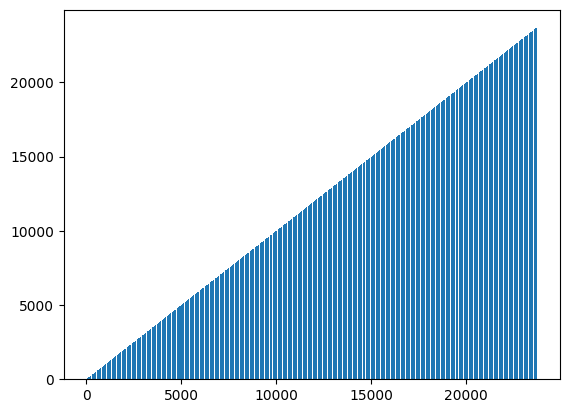

In [27]:
plt.bar(a[a.columns[2]],a[str(target)])

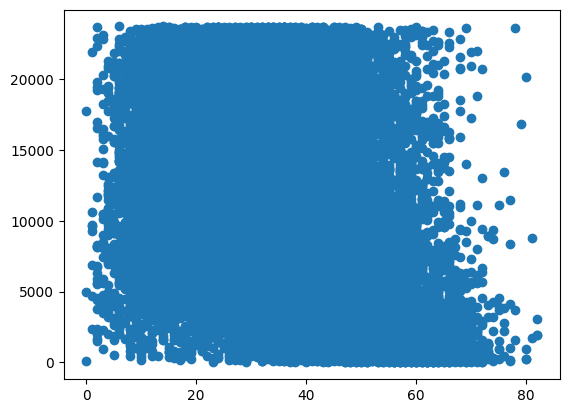

In [28]:
plt.scatter(a[a.columns[3]], a[str(target)])

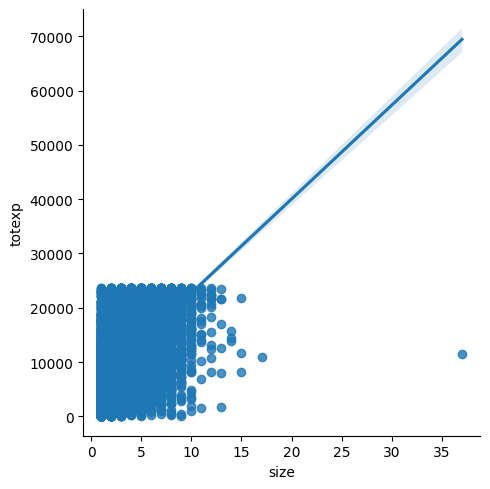

In [29]:
import seaborn as sns
a["size"] = pd.to_numeric(a["size"])
a["totexp"] = pd.to_numeric(a["totexp"])
sns.lmplot(x="size",y="totexp",data=a)

<Axes: xlabel='town', ylabel='totexp'>

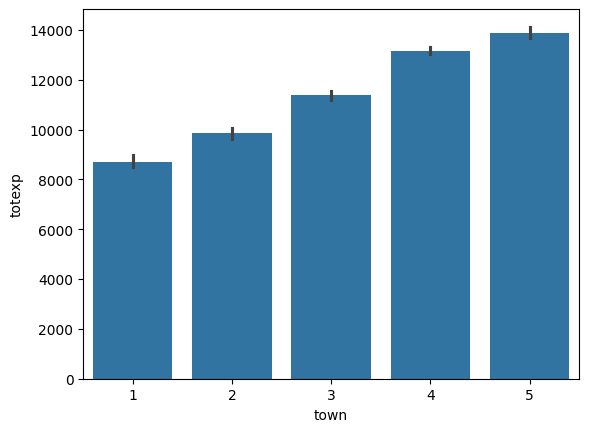

In [30]:
sns.barplot(x=a.columns[5],y=str(target),data=a)

<Axes: xlabel='sex', ylabel='totexp'>

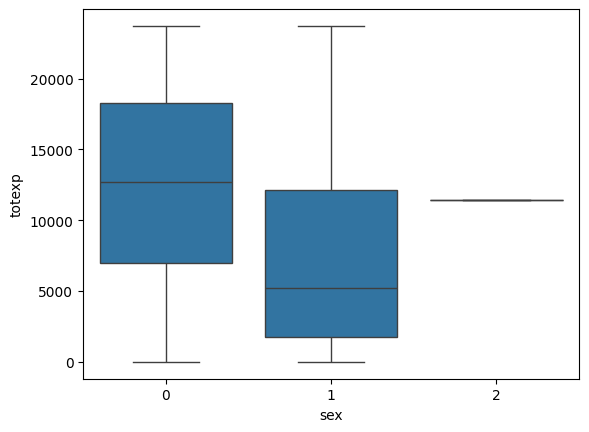

In [31]:
sns.boxplot(x=a.columns[6],y=str(target),data=a)

<ipython-input-32-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='totexp', ylabel='Density'>

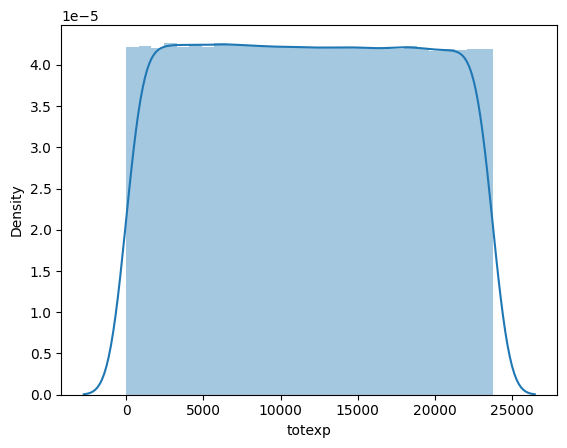

In [32]:
sns.distplot(a[str(target)])

<Axes: xlabel='wfood', ylabel='Density'>

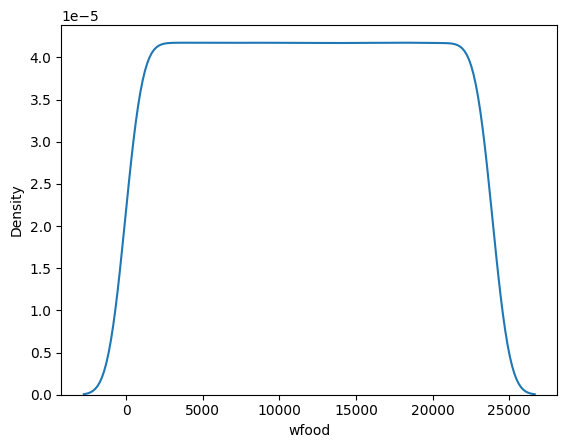

In [33]:
sns.kdeplot(a[a.columns[1]])

<Axes: xlabel='age', ylabel='count'>

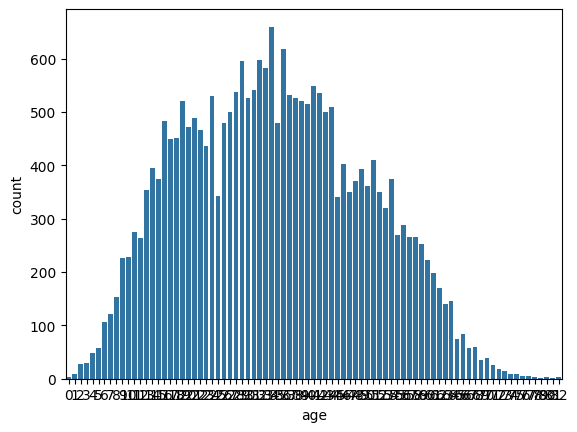

In [34]:
sns.countplot(x=a.columns[3],data=a)

<Axes: >

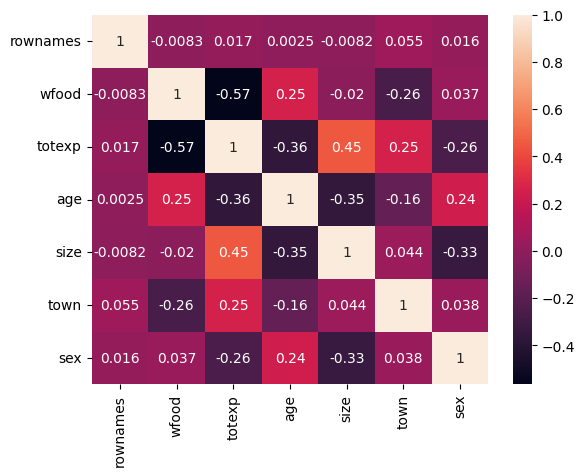

In [35]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

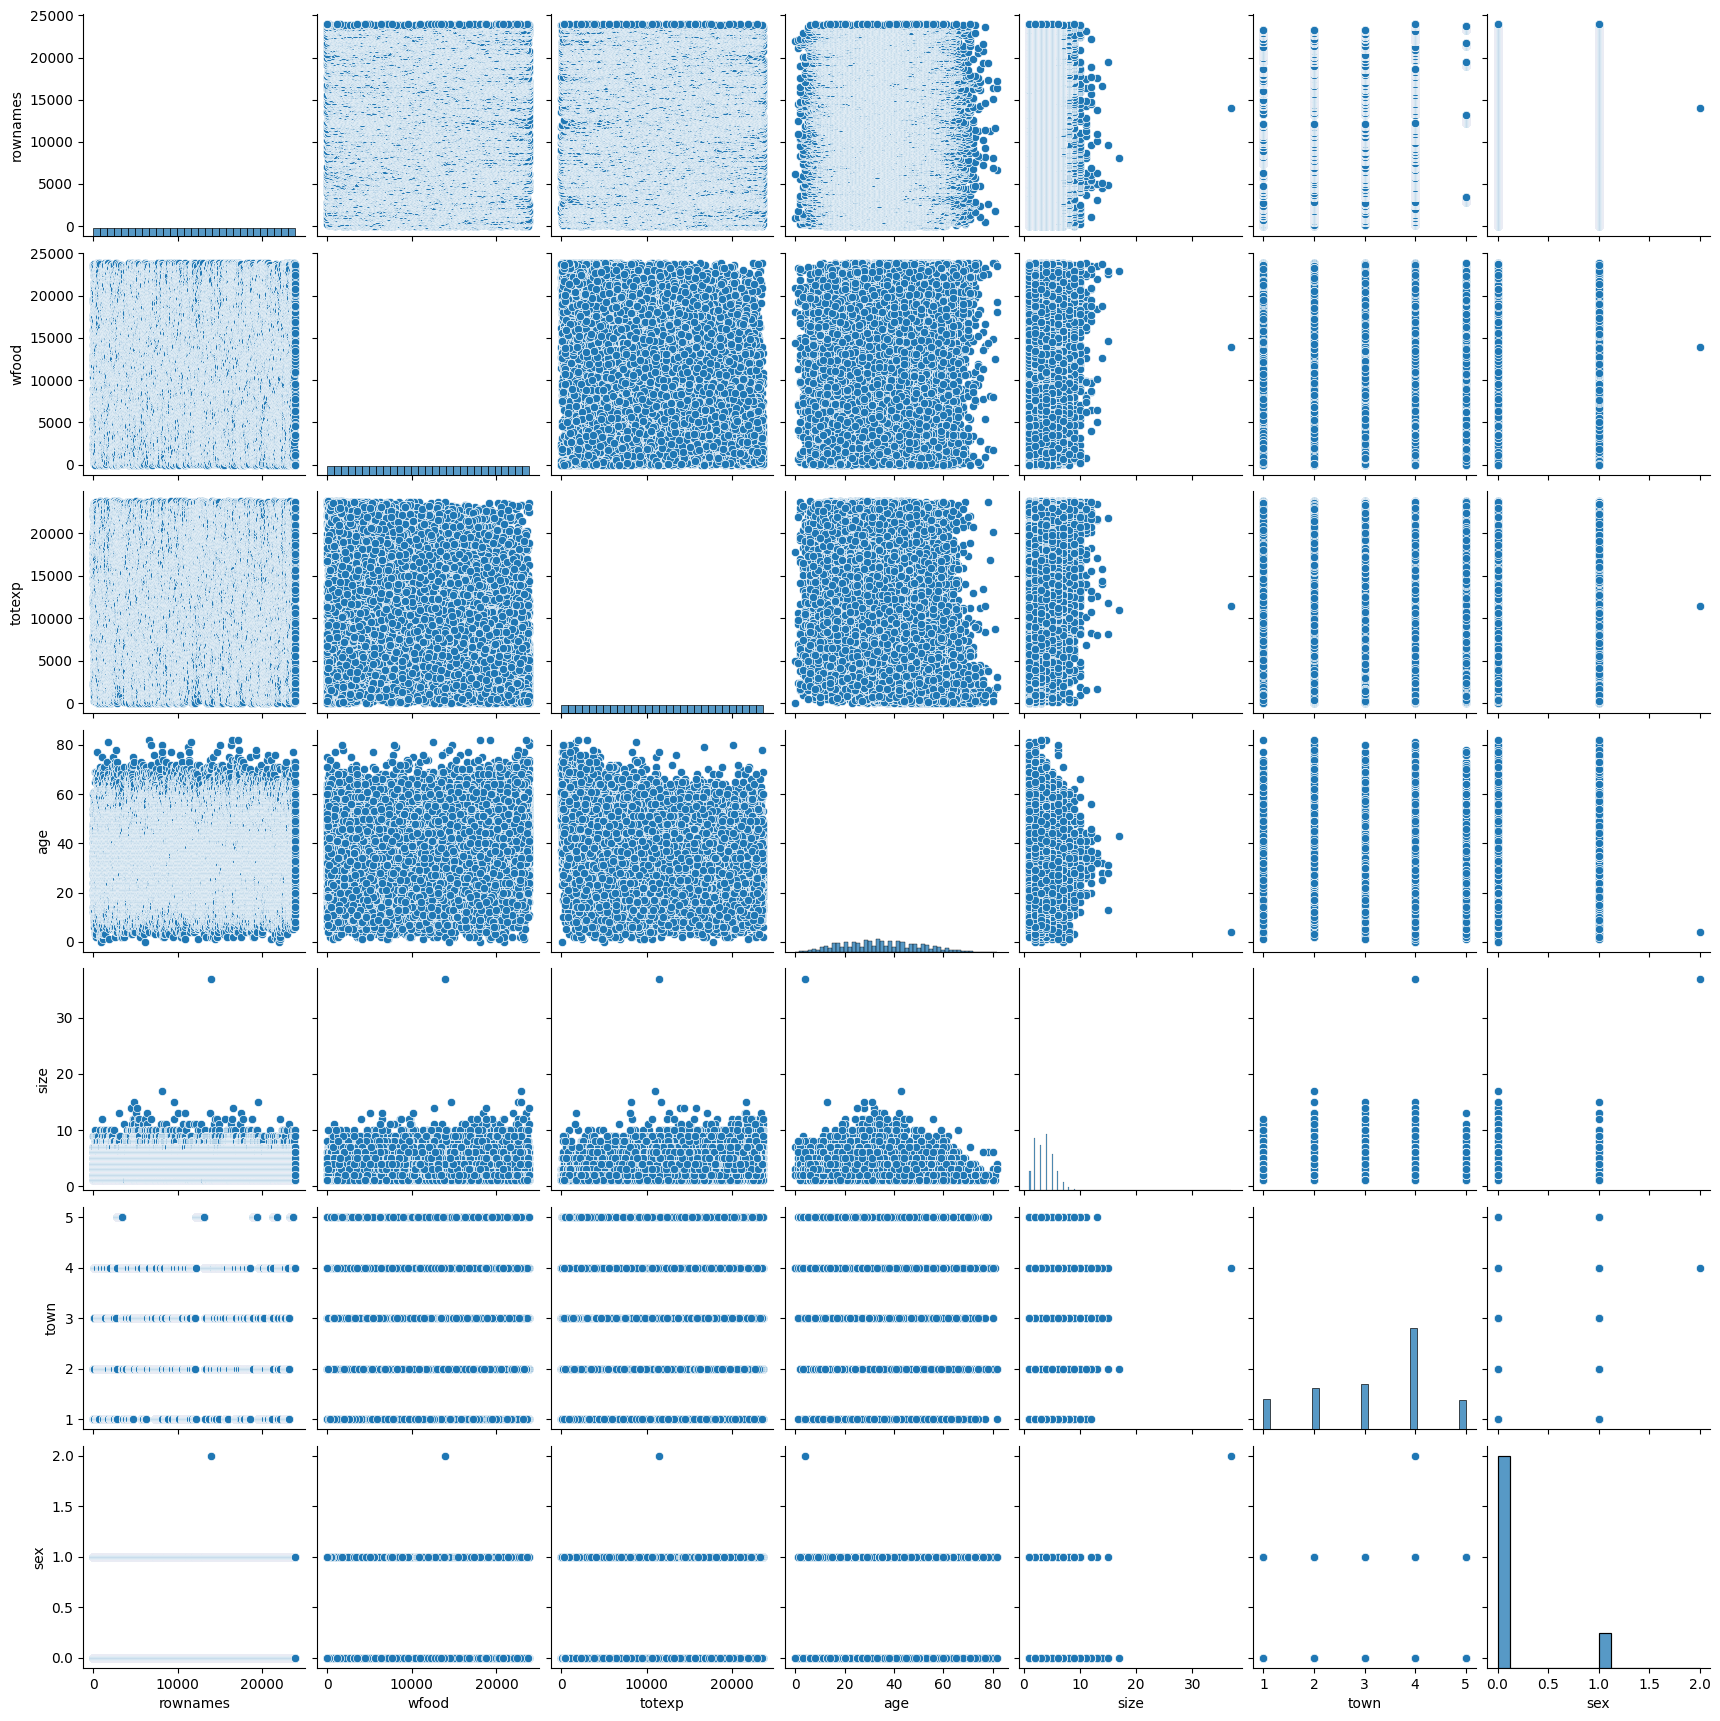

In [36]:
sns.pairplot(data=a)

In [37]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

       rownames  wfood  age  size  town  sex
0             0  17189   27     5     2    0
1             1   8928   24     3     2    0
2             2  12646   12     3     2    0
3             3  15878   44     1     2    1
4             4  14107   21     5     2    0
...         ...    ...  ...   ...   ...  ...
23967     23967  20319   71     4     4    0
23968     23968  15561   29     2     4    0
23969     23969  20735   20     3     4    0
23970     23970      0   60     1     4    1
23971     23971  13437   38     2     4    0

[23972 rows x 6 columns]


In [38]:
print(y)

0        19487
1        19390
2        13976
3         7537
4        17649
         ...  
23967     5583
23968    17580
23969    13253
23970      310
23971     3848
Name: totexp, Length: 23972, dtype: int64


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
print(x_train)

       rownames  wfood  age  size  town  sex
4225       4225  20331   46     3     1    0
9950       9950   7586   28     6     1    0
9559       9559  15365   34     4     4    0
9959       9959  17905   28     5     1    0
18273     18273  13081   42     7     1    0
...         ...    ...  ...   ...   ...  ...
20385     20385   1733   49     4     1    0
17491     17491  16862   28     4     3    0
17352     17352  14166   57     1     3    1
12159     12159  21434   24     6     4    0
13878     13878  10803   11     3     4    0

[19177 rows x 6 columns]


In [41]:
print(y_train)

4225      8143
9950     16853
9559     17662
9959     15519
18273    23291
         ...  
20385    16774
17491     8781
17352     3045
12159    11564
13878    18138
Name: totexp, Length: 19177, dtype: int64


In [42]:
print(x_test)

       rownames  wfood  age  size  town  sex
2593       2593  11856   47     2     4    0
14548     14548   1818   29     7     1    0
20448     20448   2159   51     2     4    0
8897       8897   2944   49     5     1    0
21726     21726  13042   52     2     5    0
...         ...    ...  ...   ...   ...  ...
6121       6121  20705   60     2     1    0
16847     16847  20234   24     6     3    0
23002     23002  16759   41     2     4    1
14773     14773  17606   18     6     4    0
15995     15995  13104   41     3     1    1

[4795 rows x 6 columns]


In [43]:
print(y_test)

2593      7934
14548    19536
20448     8521
8897     18971
21726     4459
         ...  
6121      2133
16847    18356
23002     4266
14773    16855
15995    12087
Name: totexp, Length: 4795, dtype: int64


In [44]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [45]:
print(ypred)

[ 9655.69097025 20991.32881363 14677.50538067 ...  5557.32317563
 13537.48113815  7063.22353432]


In [46]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [47]:
print(ypred)

[ 7135. 22496. 19968. ...  1420. 11798. 12335.]


In [48]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [49]:
print(ypred)

[10949.08 21136.3  15941.2  ...  5193.75 12208.81  7511.72]
